## Complete the Tasks in bold

**TASK: Run the cells below to import the libraries and load the dataset.**

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
df = pd.read_csv("../DATA/wine_fraud.csv")

In [101]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


**TASK: What are the unique variables in the target column we are trying to predict (quality)?**

In [103]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

**TASK: Create a countplot that displays the count per category of Legit vs Fraud. Is the label/target balanced or unbalanced?**

<AxesSubplot:xlabel='quality', ylabel='count'>

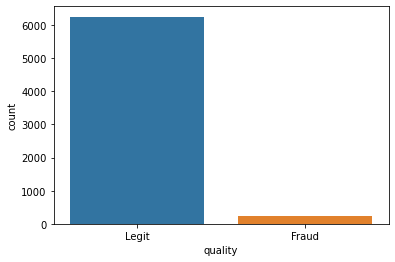

In [104]:
sns.countplot(x = df['quality'])

**TASK: Let's find out if there is a difference between red and white wine when it comes to fraud. Create a countplot that has the wine *type* on the x axis with the hue separating columns by Fraud vs Legit.**

<AxesSubplot:xlabel='type', ylabel='count'>

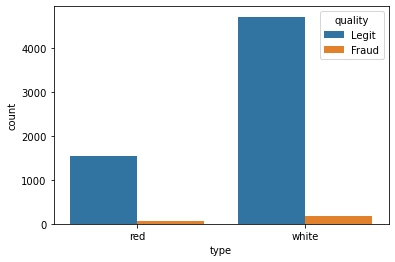

In [105]:
sns.countplot(hue = df['quality'], x = df['type'])

**TASK: What percentage of red wines are Fraud? What percentage of white wines are fraud?**

In [106]:
fraud_one = df[(df['type'] == 'white') & (df['quality'] == 'Fraud')]
len(fraud_one) / len(df[df['type'] == 'white']) *100

3.7362188648427925

In [107]:
fraud_two = df[(df['type'] == 'red') & (df['quality'] == 'Fraud')]
len(fraud_two) / len(df[df['type'] == 'red']) *100

3.9399624765478425

**TASK: Calculate the correlation between the various features and the "quality" column. To do this you may need to map the column to 0 and 1 instead of a string.**

In [108]:
df_spare = df

In [109]:
df['quality'] = df['quality'].map({'Legit':1, 'Fraud':0})

In [110]:
df.corr()['quality'].sort_values(ascending = False)

quality                 1.000000
free sulfur dioxide     0.085204
citric acid             0.061789
alcohol                 0.051141
residual sugar          0.048756
total sulfur dioxide    0.035252
sulphates               0.034046
density                -0.016351
pH                     -0.020107
fixed acidity          -0.021794
chlorides              -0.034499
volatile acidity       -0.151228
Name: quality, dtype: float64

**TASK: Create a bar plot of the correlation values to Fraudlent wine.**

<AxesSubplot:>

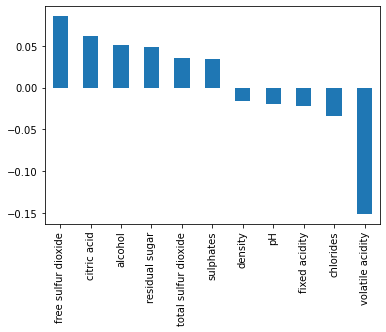

In [111]:
df.corr()['quality'][:-1].sort_values(ascending=False).plot(kind='bar')

**TASK: Create a clustermap with seaborn to explore the relationships between variables.**

<AxesSubplot:>

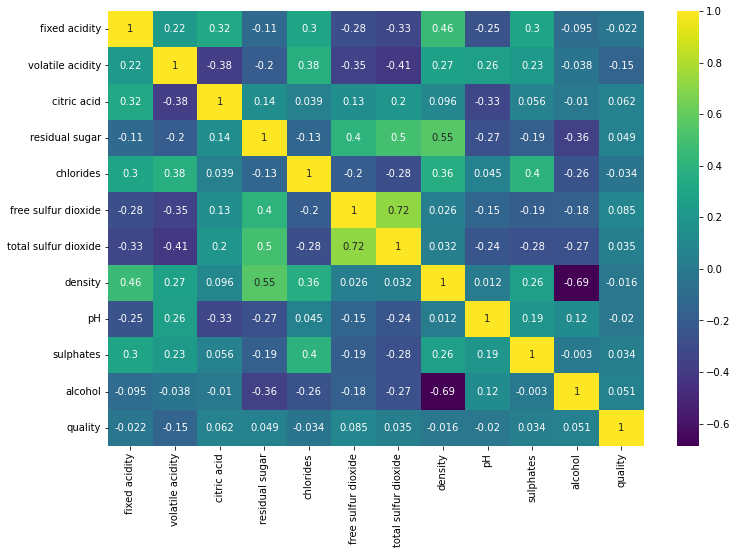

In [112]:
plt.figure(figsize=(12,8))

sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

----
## Machine Learning Model

**TASK: Convert the categorical column "type" from a string or "red" or "white" to dummy variables:**

In [113]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

trans = pd.DataFrame(ohe.fit_transform(df[['type']]).toarray())
df = df.join(trans)


In [86]:
# df['type'] = pd.get_dummies(df['type'],drop_first=True)

In [114]:
df = df.drop('type', axis = 1)

In [88]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [115]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('quality', axis = 1)
y= df['quality']

X_train, X_test, y_train, y_test = train_test_split(X,y)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Dokładność: 84.0%
Raport:
               precision    recall  f1-score   support

           0       0.14      0.66      0.23        56
           1       0.99      0.85      0.91      1569

    accuracy                           0.84      1625
   macro avg       0.56      0.76      0.57      1625
weighted avg       0.96      0.84      0.89      1625



''

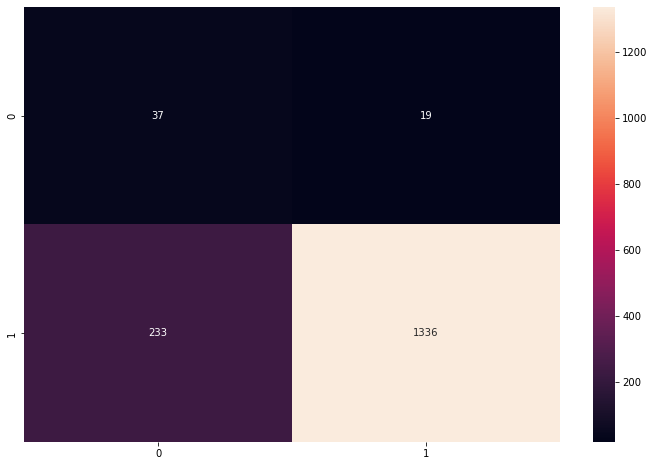

In [116]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC

plt.figure(figsize = (12, 8))
model = SVC(class_weight='balanced', C=1, gamma='auto')
model.fit(X_train, y_train)

prediction = model.predict(X_test)

print('\033[1m' + f'Dokładność: {100 * round(accuracy_score(prediction, y_test), 2)}%' )
print(f'Raport:\n {classification_report(y_test, prediction)}')

sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt='.5g')
;

Dokładność: 90.0%
Raport:
               precision    recall  f1-score   support

           0       0.03      0.07      0.05        56
           1       0.97      0.93      0.95      1569

    accuracy                           0.90      1625
   macro avg       0.50      0.50      0.50      1625
weighted avg       0.93      0.90      0.91      1625



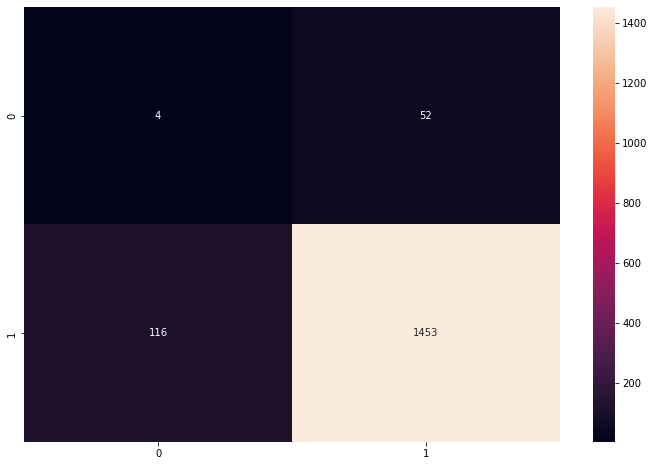

In [118]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
plt.figure(figsize = (12, 8))
model.fit(X_train, y_train)

prediction = model.predict(X_test)

print('\033[1m' + f'Dokładność: {100 * round(accuracy_score(prediction, y_test), 2)}%' )
print(f'Raport:\n {classification_report(y_test, prediction)}')

sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt='.5g');

Dokładność: 97.0%
Raport:
               precision    recall  f1-score   support

           0       1.00      0.11      0.19        56
           1       0.97      1.00      0.98      1569

    accuracy                           0.97      1625
   macro avg       0.98      0.55      0.59      1625
weighted avg       0.97      0.97      0.96      1625



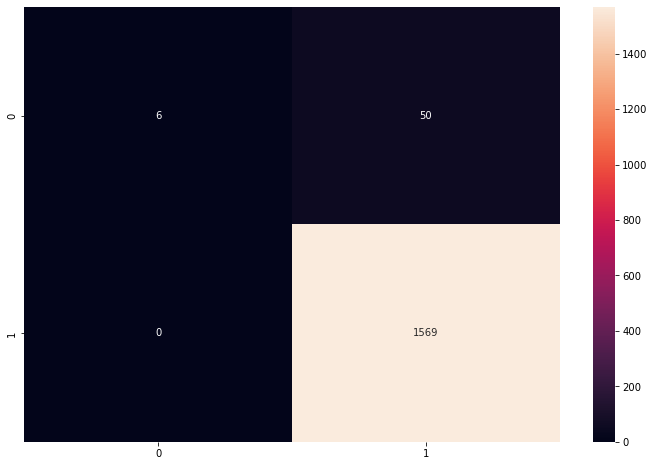

In [124]:
from sklearn.ensemble import RandomForestClassifier

plt.figure(figsize = (12, 8))
model = RandomForestClassifier(class_weight = 'balanced')
model.fit(X_train, y_train)

prediction = model.predict(X_test)

print('\033[1m' + f'Dokładność: {100 * round(accuracy_score(prediction, y_test), 2)}%' )
print(f'Raport:\n {classification_report(y_test, prediction)}')

sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt='.5g');

Dokładność: 97.0%
Raport:
               precision    recall  f1-score   support

           0       0.65      0.20      0.30        56
           1       0.97      1.00      0.98      1569

    accuracy                           0.97      1625
   macro avg       0.81      0.60      0.64      1625
weighted avg       0.96      0.97      0.96      1625



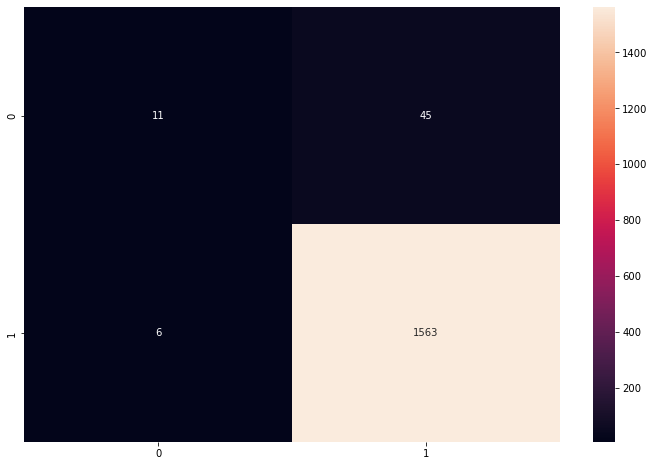

In [117]:
from xgboost.sklearn import XGBClassifier

model = XGBClassifier(n_estimators = 50, max_depth = 6, max_leaves = 5)
plt.figure(figsize = (12, 8))
model.fit(X_train, y_train)

prediction = model.predict(X_test)

print('\033[1m' + f'Dokładność: {100 * round(accuracy_score(prediction, y_test), 2)}%' )
print(f'Raport:\n {classification_report(y_test, prediction)}')

sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt='.5g');